In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt
from numpy import concatenate
from pandas import *
from sklearn.preprocessing import *
from sklearn.metrics import *
from tensorflow import keras
import tensorflow as tf
import time as t

In [49]:
w=16

In [50]:
dataFromSensors=np.load("DataWithLabels/dataFromSensors_"+str(w)+".npy")

In [51]:
np.info(dataFromSensors)

class:  ndarray
shape:  (475321, 16, 16)
strides:  (2048, 128, 8)
itemsize:  8
aligned:  True
contiguous:  True
fortran:  False
data pointer: 0x25a3c5cf040
byteorder:  little
byteswap:  False
type: float64


In [52]:
labels=np.load("DataWithLabels/labels_"+str(w)+".npy")

In [53]:
np.info(labels)

class:  ndarray
shape:  (475321,)
strides:  (8,)
itemsize:  8
aligned:  True
contiguous:  True
fortran:  True
data pointer: 0x25721aaa040
byteorder:  little
byteswap:  False
type: float64


In [54]:
#values = reframed_df.values
#training_sample =int( len(dataset) *0.8)
training_sample_labels =int( len(labels) *0.8)
training_sample =int( len(dataFromSensors) *0.8)
#testDataset=DataFrame.to_numpy(dataset)
#testDataset=DataFrame.to_numpy(reframed_df)

In [55]:
training_sample_labels

380256

In [56]:
training_sample

380256

In [57]:
train_labels = labels[:training_sample]
train = dataFromSensors[:training_sample, : ,:]
test_labels = labels[training_sample:]
test = dataFromSensors[training_sample:, : , :]
# split into input and outputs
#train_X, train_y = train[:,:, 1:], train[:,:,0]
#test_X, test_y = test[:,:, 1:], test[:,:,0]
train_X, train_y = train[:,:, 1:], train_labels[:]
test_X, test_y = test[:,:, 1:], test_labels[:]

In [58]:
train_X.shape

(380256, 16, 15)

In [59]:
train_y

array([0., 0., 0., ..., 0., 0., 0.])

In [60]:
#print(train_X)

In [61]:
train_y.shape

(380256,)

In [62]:
#print(test_y)

In [63]:
train_y=train_y.reshape(train_y.shape[0],1)

In [64]:
test_y=test_y.reshape(test_y.shape[0],1)

In [65]:
#print(train_X)

In [66]:
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(380256, 16, 15) (380256, 1) (95065, 16, 15) (95065, 1)


In [67]:
model_gru =  keras.models.Sequential([
    keras.layers.GRU(128,return_sequences=True,input_shape=(train_X.shape[1],train_X.shape[2])),#,activation='relu'),
    keras.layers.GRU(units=64,return_sequences=True),#,activation='relu'),
    keras.layers.GRU(units=32),#,activation='relu'),
    keras.layers.Dense(units=50,activation='sigmoid'),
    keras.layers.Dense(units=1,activation='sigmoid')
                        ])
model_gru.compile(loss='MeanSquaredError', optimizer='sgd',metrics=['accuracy'])

In [68]:
model_gru.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_6 (GRU)                 (None, 16, 128)           55680     
                                                                 
 gru_7 (GRU)                 (None, 16, 64)            37248     
                                                                 
 gru_8 (GRU)                 (None, 32)                9408      
                                                                 
 dense_4 (Dense)             (None, 50)                1650      
                                                                 
 dense_5 (Dense)             (None, 1)                 51        
                                                                 
Total params: 104,037
Trainable params: 104,037
Non-trainable params: 0
_________________________________________________________________


In [69]:
 start = t.time()

In [70]:
# fit network
gru_history = model_gru.fit(train_X, train_y, epochs=140,validation_data=(test_X, test_y), batch_size=128)#, shuffle=False)

Epoch 1/140
2971/2971 [==============================] - 58s 16ms/step - loss: 0.1935 - accuracy: 0.7360 - val_loss: 0.1852 - val_accuracy: 0.7531
Epoch 2/140
2971/2971 [==============================] - 46s 16ms/step - loss: 0.1912 - accuracy: 0.7393 - val_loss: 0.1839 - val_accuracy: 0.7531
Epoch 3/140
2971/2971 [==============================] - 46s 16ms/step - loss: 0.1889 - accuracy: 0.7393 - val_loss: 0.1810 - val_accuracy: 0.7531
Epoch 4/140
2971/2971 [==============================] - 46s 16ms/step - loss: 0.1840 - accuracy: 0.7393 - val_loss: 0.1757 - val_accuracy: 0.7532
Epoch 5/140
2971/2971 [==============================] - 49s 17ms/step - loss: 0.1787 - accuracy: 0.7410 - val_loss: 0.1710 - val_accuracy: 0.7528
Epoch 6/140
2971/2971 [==============================] - 49s 16ms/step - loss: 0.1745 - accuracy: 0.7421 - val_loss: 0.1671 - val_accuracy: 0.7544
Epoch 7/140
2971/2971 [==============================] - 47s 16ms/step - loss: 0.1713 - accuracy: 0.7406 - val_loss: 0

2971/2971 [==============================] - 48s 16ms/step - loss: 0.1551 - accuracy: 0.7577 - val_loss: 0.1522 - val_accuracy: 0.7619
Epoch 57/140
2971/2971 [==============================] - 47s 16ms/step - loss: 0.1550 - accuracy: 0.7578 - val_loss: 0.1528 - val_accuracy: 0.7634
Epoch 58/140
2971/2971 [==============================] - 47s 16ms/step - loss: 0.1549 - accuracy: 0.7583 - val_loss: 0.1549 - val_accuracy: 0.7603
Epoch 59/140
2971/2971 [==============================] - 47s 16ms/step - loss: 0.1548 - accuracy: 0.7584 - val_loss: 0.1521 - val_accuracy: 0.7636
Epoch 60/140
2971/2971 [==============================] - 47s 16ms/step - loss: 0.1547 - accuracy: 0.7587 - val_loss: 0.1514 - val_accuracy: 0.7644
Epoch 61/140
2971/2971 [==============================] - 47s 16ms/step - loss: 0.1547 - accuracy: 0.7585 - val_loss: 0.1516 - val_accuracy: 0.7626
Epoch 62/140
2971/2971 [==============================] - 47s 16ms/step - loss: 0.1545 - accuracy: 0.7589 - val_loss: 0.1512 

2971/2971 [==============================] - 49s 17ms/step - loss: 0.1500 - accuracy: 0.7689 - val_loss: 0.1472 - val_accuracy: 0.7738
Epoch 112/140
2971/2971 [==============================] - 49s 16ms/step - loss: 0.1500 - accuracy: 0.7693 - val_loss: 0.1470 - val_accuracy: 0.7737
Epoch 113/140
2971/2971 [==============================] - 50s 17ms/step - loss: 0.1499 - accuracy: 0.7691 - val_loss: 0.1479 - val_accuracy: 0.7723
Epoch 114/140
2971/2971 [==============================] - 51s 17ms/step - loss: 0.1498 - accuracy: 0.7694 - val_loss: 0.1471 - val_accuracy: 0.7740
Epoch 115/140
2971/2971 [==============================] - 50s 17ms/step - loss: 0.1497 - accuracy: 0.7697 - val_loss: 0.1472 - val_accuracy: 0.7739
Epoch 116/140
2971/2971 [==============================] - 64s 22ms/step - loss: 0.1497 - accuracy: 0.7697 - val_loss: 0.1475 - val_accuracy: 0.7747
Epoch 117/140
2971/2971 [==============================] - 49s 16ms/step - loss: 0.1497 - accuracy: 0.7699 - val_loss: 0

In [71]:
pred_y =  model_gru.predict(test_X)

2971/2971 [==============================] - 16s 5ms/step


In [72]:
stop=t.time()-start
print(stop)

6663.909758090973


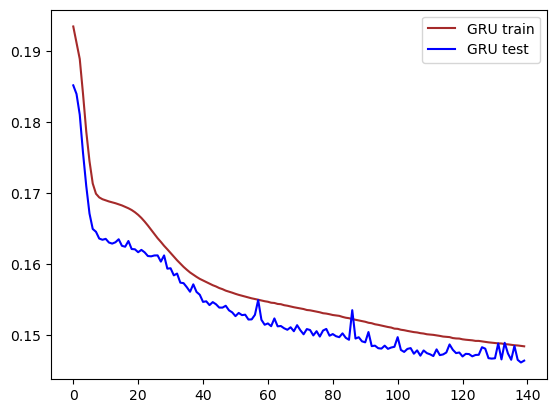

In [73]:
plt.plot(gru_history.history['loss'], label='GRU train', color='brown')
plt.plot(gru_history.history['val_loss'], label='GRU test', color='blue')
plt.legend()
plt.show()

In [74]:
print(test_y)

[[0.]
 [0.]
 [0.]
 ...
 [0.]
 [0.]
 [0.]]


In [75]:
np.shape(pred_y)

(95065, 1)

In [76]:
pred_y

array([[0.00512907],
       [0.00507918],
       [0.00370849],
       ...,
       [0.10531847],
       [0.10005344],
       [0.09759753]], dtype=float32)

In [77]:
pred_y=np.reshape(pred_y,95065)

0.1463567106502282
0.2129840238541738
0.3825659559477662
0.2982731798069811


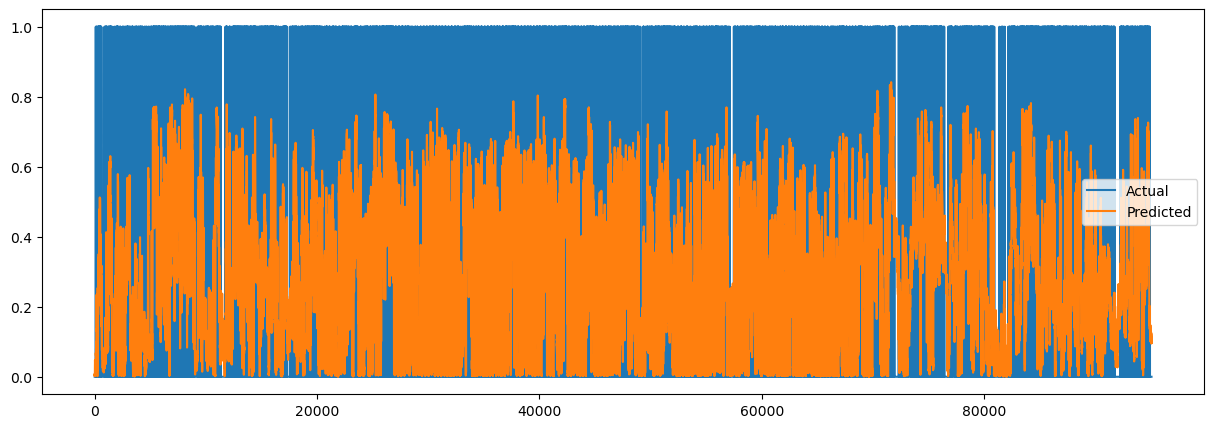

In [78]:

plt.rcParams['figure.figsize'] = (15,5)

MSE = mean_squared_error(test_y, pred_y)
R2 = r2_score(test_y, pred_y)
RMSE = sqrt(mean_squared_error(test_y, pred_y))
MAE = mean_absolute_error(test_y, pred_y)


print(MSE)
print(R2)
print(RMSE)
print(MAE)


plt.plot(test_y, label = 'Actual')
plt.plot(pred_y, label = 'Predicted')
plt.legend()
plt.show()

In [79]:
np.shape(train_X)

(380256, 16, 15)

In [80]:
np.shape(train_y)

(380256, 1)

In [81]:
np.shape(test_X)

(95065, 16, 15)

In [82]:
np.shape(test_y)

(95065, 1)

14854/14854 [==============================] - 76s 5ms/step


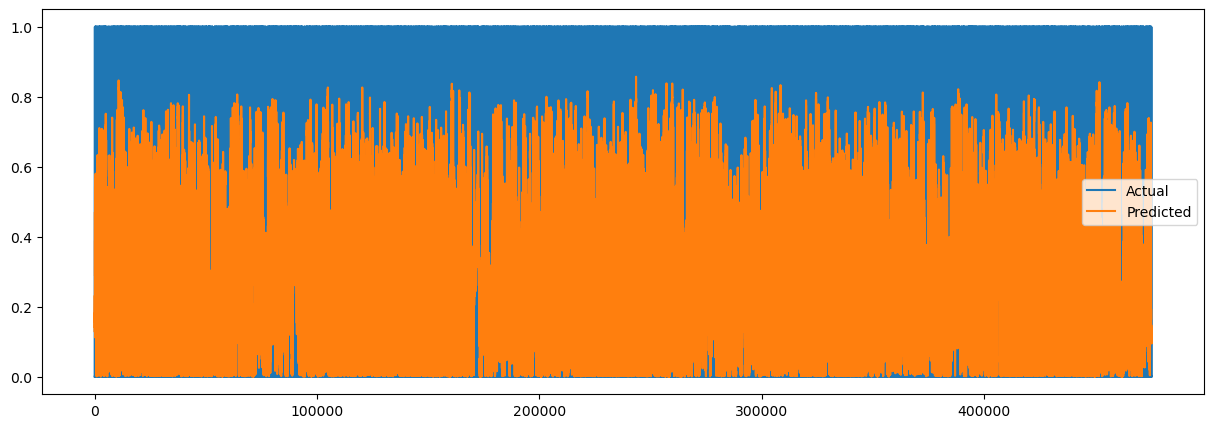

In [83]:
tra = np.concatenate([train_X,test_X])
tes = np.concatenate([train_y,test_y])
fp = model_gru.predict(tra)
plt.plot(tes, label = 'Actual')
plt.plot(fp, label = 'Predicted')
plt.legend()
plt.show()

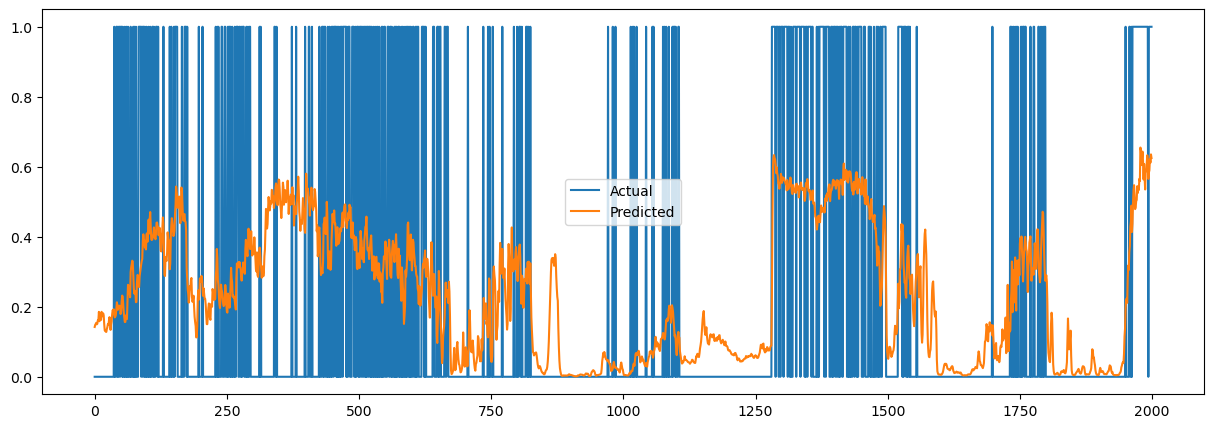

In [84]:
plt.plot(tes[:2000], label = 'Actual')
plt.plot(fp[:2000], label = 'Predicted')
plt.legend()
plt.show()

In [85]:
print(sum(tes)/len(tes))

[0.25794568]


In [86]:
#print(fp[1000:1010])
_fp = np.where(fp>0.5,1,0)
_all = sum(_fp)
_w = (_fp*tes)
print(sum(_w)/_all)
      
_all_z = sum(1-_fp)      
_w_z = (1-_fp)*(1-tes)
print(sum(_w_z)/_all_z)
print('total acc', (sum(_w)+sum(_w_z))/len(_w))

[0.59378644]
[0.80977349]
total acc [0.77352989]


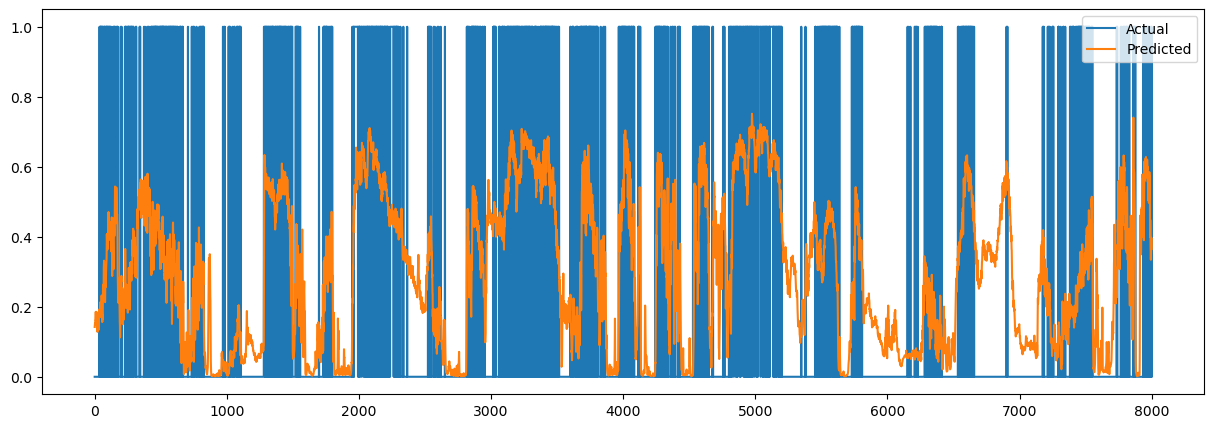

In [87]:
plt.plot(tes[:8000], label = 'Actual')
plt.plot(fp[:8000], label = 'Predicted')
plt.legend()
plt.show()

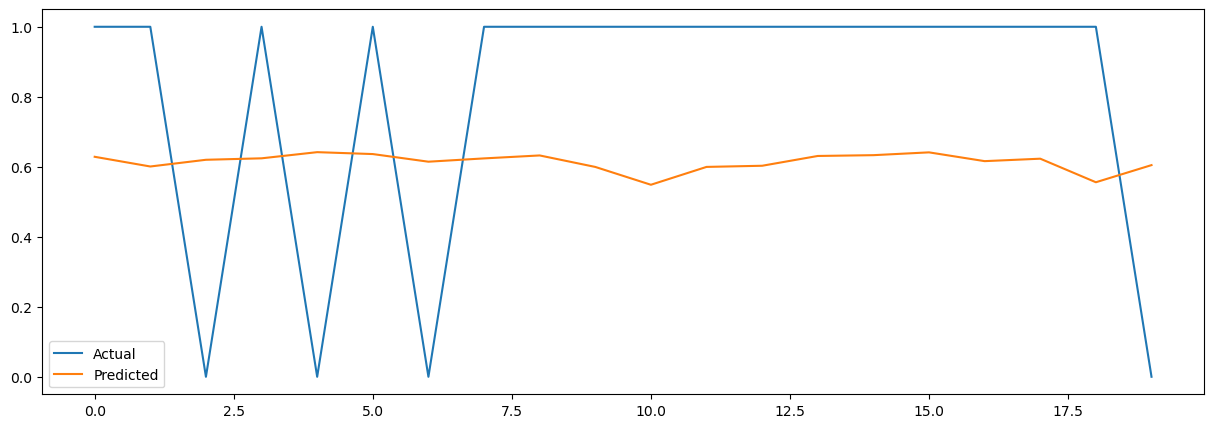

In [88]:
#over very small part of data
plt.plot(tes[2000:2020], label = 'Actual')
plt.plot(fp[2000:2020], label = 'Predicted')
plt.legend()
plt.show()

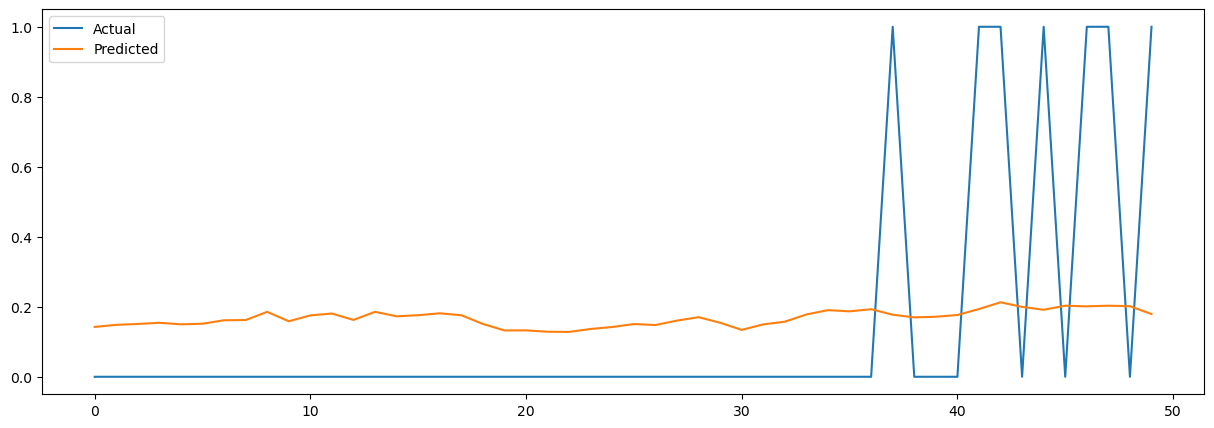

In [89]:
plt.plot(tes[:50], label = 'Actual')
plt.plot(fp[:50], label = 'Predicted')
plt.legend()
plt.show()

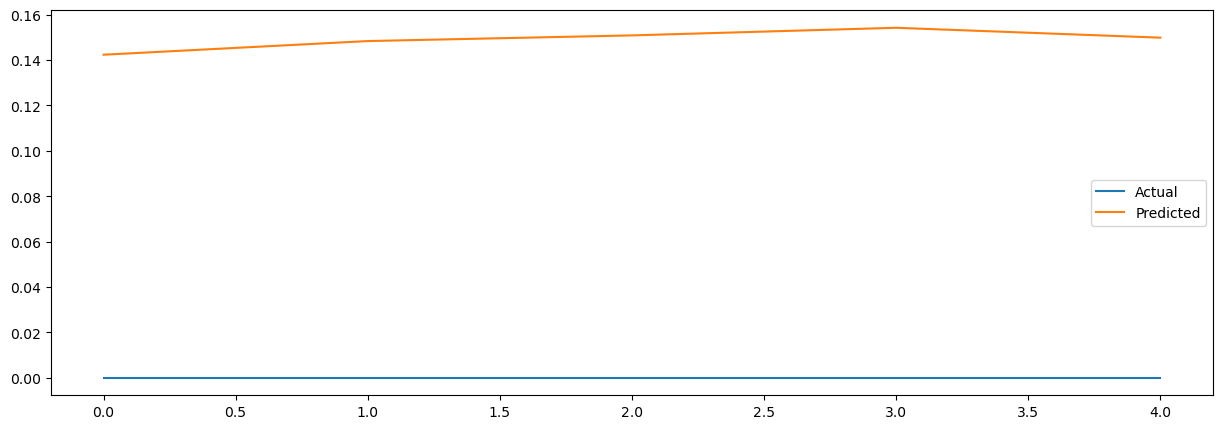

In [90]:
plt.plot(tes[:5], label = 'Actual')
plt.plot(fp[:5], label = 'Predicted')
plt.legend()
plt.show()